# EDA y ETL de datos

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_excel('bd_ventas_ESP.xlsx', sheet_name = None)

In [3]:
df_1 = df['RegistroVentas']
df_2 = df['Productos']
df_3 = df['Tiendas']

In [8]:
df_1.head(10)

,ID,Fecha_ Pedido,Cod_Tienda,id_producto,Qtde,Precio_Unitario
0,AX144,2023-01-15,A1500111,1007,35,630.99
1,AX4456,2023-07-27,A5200100,1007,33,630.99
2,AX2320,2023-08-03,A1500108,1005,132,999.00
3,AX4314,2023-07-04,A1500107,1005,72,999.00
4,AX151,2023-01-15,A1500111,1007,44,630.99
5,AX5161,2023-11-18,A3100104,1007,46,630.99
6,AX2399,2023-08-15,A1500111,1005,64,999.00
7,AX2946,2023-11-12,A1500108,1007,26,630.99
8,AX1141,2023-04-09,A1500110,1007,27,630.99
9,AX370,2023-02-01,A1500111,1005,45,999.00


In [7]:
df_2.head(10)

,id_produto,descripción_producto,img_url
0,1001,Gorra,https://i.imgur.com/X4JTv0h.png
1,1002,Tennis,https://i.imgur.com/9NQtzTO.png
2,1003,Maleta,https://i.imgur.com/kQjbSiF.png
3,1004,Billetera,https://i.imgur.com/4QcHBzp.png
4,1005,Bolso,https://i.imgur.com/m4JBXe5.png
5,1006,Audifinos,https://i.imgur.com/TxpAjIc.png
6,1007,Mochila,https://i.imgur.com/aJK19L9.png
7,1008,Botella,https://i.imgur.com/fqeyGoK.png


In [6]:
df_3.head(10)

,codigo_Tienda,nombre_Tienda,Ciudad,Nombre_Estado,Sigla_Estado,Latitud,Longitud
0,A5200050,Tienda 1,Salvador,Bahia,BA,-12.989900,-38.490082
1,A3100104,Tienda 2,Vitória,Espírito Santo,ES,-20.297944,-40.295975
2,A5200100,Tienda 3,Manaus,Amazonas,AM,-3.073029,-60.007189
3,A1500111,Tienda 4,São Luís,Maranhão,MA,-2.555839,-44.254537
4,A1500107,Tienda 5,São Paulo,São Paulo,SP,-23.609171,-46.693753
5,A1500108,Tienda 6,Niterói,Rio de Janeiro,RJ,-22.917908,-43.089109
6,A1500109,Tienda 7,Curitiba,Paraná,PR,-25.463720,-49.285256
7,A1500110,Tienda 8,Goiânia,Goiás,GO,-16.697754,-49.277471


In [9]:
df_1.isnull().sum()

ID                 0
Fecha_ Pedido      0
Cod_Tienda         0
id_producto        0
Qtde               0
Precio_Unitario    0
dtype: int64

In [10]:
df_1.shape

(4761, 6)

## ETL

In [11]:
# Creo una nueva columna con el nombre facturación que guarde la multiplicación de la columna Qtde por la columna Precio_unitario

df_1['facturación'] = df_1['Qtde'] * df_1['Precio_Unitario']
df_1.head()

,ID,Fecha_ Pedido,Cod_Tienda,id_producto,Qtde,Precio_Unitario,facturación
0,AX144,2023-01-15,A1500111,1007,35,630.99,22084.65
1,AX4456,2023-07-27,A5200100,1007,33,630.99,20822.67
2,AX2320,2023-08-03,A1500108,1005,132,999.00,131868.00
3,AX4314,2023-07-04,A1500107,1005,72,999.00,71928.00
4,AX151,2023-01-15,A1500111,1007,44,630.99,27763.56


## EDA

In [15]:
# Vemos la información general del DataFrame
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4761 entries, 0 to 4760
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   ID               4761 non-null   object        
 1   Fecha_ Pedido    4761 non-null   datetime64[ns]
 2   Cod_Tienda       4761 non-null   object        
 3   id_producto      4761 non-null   int64         
 4   Qtde             4761 non-null   int64         
 5   Precio_Unitario  4761 non-null   float64       
 6   facturación      4761 non-null   float64       
dtypes: datetime64[ns](1), float64(2), int64(2), object(2)
memory usage: 260.5+ KB


In [16]:
# vemos un resumen estadístico de la columna
df_1.describe()

,Fecha_ Pedido,id_producto,Qtde,Precio_Unitario,facturación
count,4761,4761.000000,4761.000000,4761.000000,4761.000000
mean,2023-06-16 03:31:43.213610496,1004.568578,40.804663,386.169653,15303.774367
min,2023-01-01 00:00:00,1001.000000,1.000000,119.300000,119.300000
25%,2023-03-19 00:00:00,1003.000000,21.000000,159.000000,4929.000000
50%,2023-06-04 00:00:00,1005.000000,33.000000,210.000000,9240.000000
75%,2023-09-13 00:00:00,1007.000000,47.000000,630.990000,19851.780000
max,2023-12-31 00:00:00,1008.000000,416.000000,999.000000,203796.000000
std,NaN,2.288529,36.037820,284.897852,17575.462429


<Axes: >

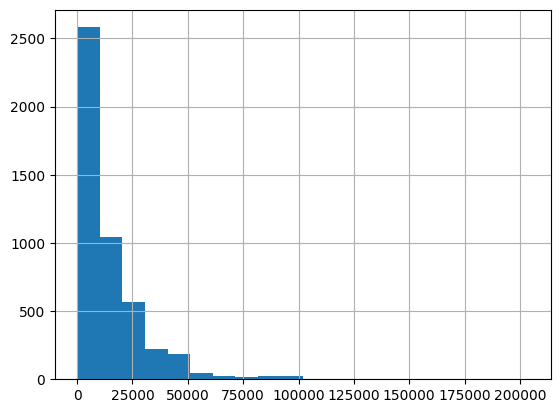

In [17]:
# Vemos la distribución de la columna facturación
df_1['facturación'].hist(bins=20)

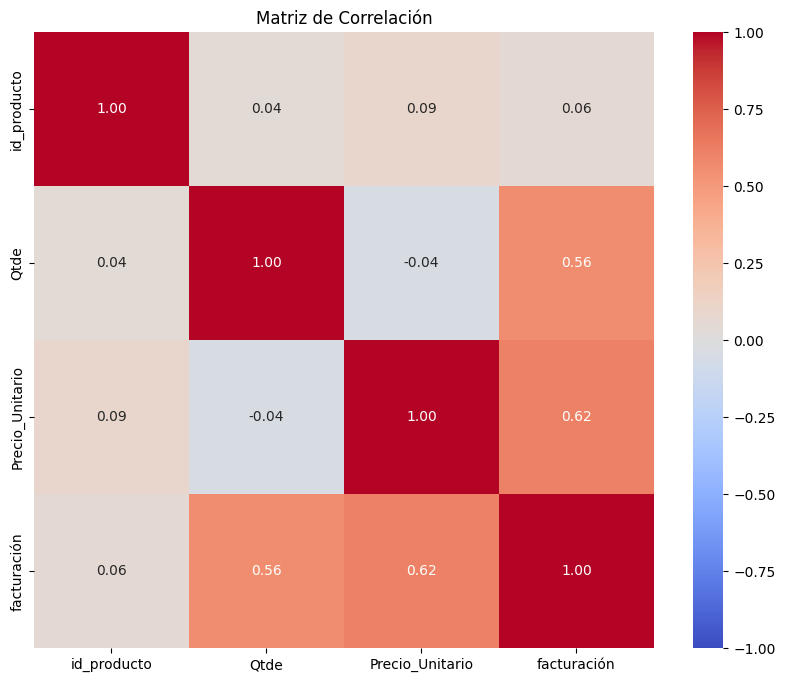

In [19]:
# Vemos una matriz de correlación
df_numerico = df_1.select_dtypes(include='number')

corr_matrix = df_numerico.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', vmin=-1, vmax=1)
plt.title('Matriz de Correlación')
plt.show()

<Axes: xlabel='Fecha_ Pedido'>

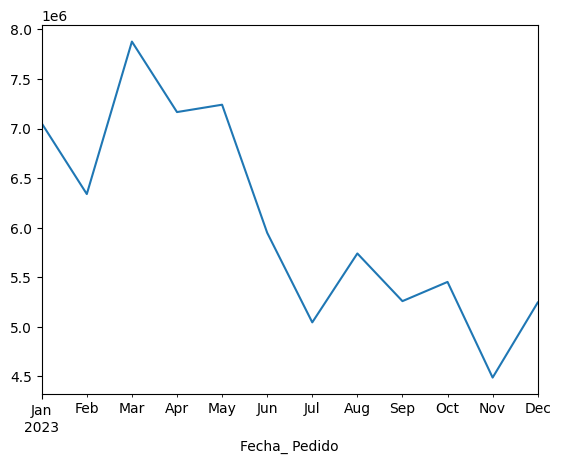

In [24]:
# Observamos la tendencia temporal de los pedidos en los mese que se factura más
df_1['Fecha_ Pedido'] = pd.to_datetime(df_1['Fecha_ Pedido'])

df_1.groupby(df_1['Fecha_ Pedido'].dt.to_period("M"))['facturación'].sum().plot(kind='line')

In [27]:
# Guardamos los DataFrames en un excel
with pd.ExcelWriter('bd_limpio.xlsx') as writer:
    # Guarda el primer DataFrame en la primera hoja
    df_1.to_excel(writer, sheet_name='RegistroVentas', index=False)
    
    # Guarda el segundo DataFrame en la segunda hoja
    df_2.to_excel(writer, sheet_name='Productos', index=False)

    # Guarda el tercer DataFrame en la tercera hoja
    df_3.to_excel(writer, sheet_name='Tiendas', index=False)